<div style="text-align: center;">

# **Tarea 2: Algoritmo Genético**

---

**Hecho por:**  
José Carlos Velázquez Pazarán

**Materia:**  
Cómputo Evolutivo

**Diplomado:** 
Inteligencias Artificial Aplicada

**Docente:**  
Dra. Dora E. Alvarado Carrillo

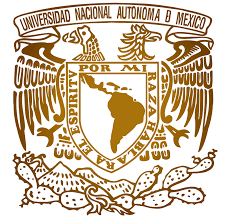

---

**Agosto 2024**

</div>



En este proyecto se implementará un AG para resolver un problema de optimización simple.

Para llevar a acabo este proyecto se creará una función matemática simple (por ejemplo, maximizar **$f(x) = x^{2}$** donde $x$ varía entre 0 y 31). Posteriormente se codificará los valores de $x$ en cromosomas binarios de longitud 5. Una vez hecho esto se definirá la función de aptitud como el valor de la función $f(x)$ para cada cromosoma. Mencionados los puntos anteriores, es necesario genrar una población inicial de cromosomas de manera aleatoria e implementar los operadores de selección, cruce y mutación. Se evaluará el rendimiento del AG durante un determinado número de generaciones. Finalmente analizaremos los resultados y se llegará a una conclusión si el AG ha encontrado la solución óptima.

**En resumen:**
- Elige una función matemática simple (por ejemplo, maximizar f(x) = x^2 donde x varía entre 0 y 31).
- Codifica los valores de x en cromosomas binarios de longitud 5.
- Define la función de aptitud como el valor de la función f(x) para cada cromosoma.
- Genera una población inicial de cromosomas de manera aleatoria.
- Implementa los operadores de selección, cruce y mutación.
- Deja que el algoritmo evolucione durante un número determinado de generaciones.
- Analiza los resultados y concluye si el AG ha encontrado la solución óptima.

### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Función de aptitud

Se propone la siguiente función de aptitud:
$$f(x) = \frac{1}{(1+e^{-x})}$$

In [2]:
def funcion_matemica(x):
    return  1/(1+np.exp(-x))

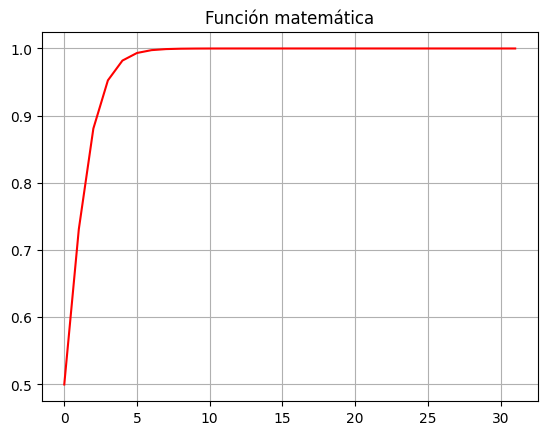

In [3]:
#Ejemplo.
x = np.arange(0,32)
y = funcion_matemica(x)
plt.plot(x,y,'r-')
plt.title('Función matemática')
plt.grid(True)
plt.show()

### Codificación de los valores $x$ en cromosoma binarios de longitud 5.

In [4]:
def bin2dec(cadena, _min, _max):
    """Convierte un segmento binario en un valor decimal dentro de un rango definido.

    Args:
        cadena (np.array): Cromosoma de n poblaciones.
        _min (int): Valor mínimo del rango.
        _max (int): Valor máximo del rango.

    Returns:
        _type_: _description_
    """
    longitud = len(cadena)
    valor_posicional = np.asarray([2**i for i in range(longitud)])[::-1]
    valor_decimal = cadena.dot(valor_posicional)
    max_binario = (2 ** longitud) - 1
    
    return _min + (valor_decimal / max_binario) * (_max - _min)

### Función de Aptitud
En este problema, la función de aptitud se define como:

$$ f(x) = 
\begin{cases} 
\text{$\frac{1}{(1+e^{-x})}$,} & \text{} \text{$0 \leq x \leq 31$} \\
\text{$0$,} & \text{en otro caso}
\end{cases} $$

In [5]:
def funcion_aptitud(cromosoma, _min, _max):
    #Aqui va la función de binario a decimal y la gardamos en la variable x
    x = bin2dec(cromosoma, _min, _max)
    
    if x < 0 or x > 31:
        return 0 # ! Penalización
    
    return funcion_matemica(x) 
    

### Genera una población inicial de cromosomas de manera aleatoria.

In [6]:
def generar_poblacion(n, l):
    """Crea una población inicial de crmosomas binrarios.

    Args:
        n (int): número de individuos en la población,
        l (int): Longitud de cada cromosoma. Default l = 9

    Returns:
        np.array(): Matriz n x l
    """
    return np.random.randint(2, size=(n, l))

In [7]:
cromosoma = generar_poblacion(45,5)[0]
print(cromosoma)
funcion_aptitud(cromosoma,25,45)

[0 0 1 1 0]


0.9999999999997107

$$P(i) = \frac{2(N-i+1)}{N(N+1)}$$

In [8]:
def ranking(poblacion,longitud):
    aptitudes = np.sort(np.array([funcion_aptitud(ind,0,31) for ind in poblacion]))
    print(aptitudes)
    longitud = len(aptitudes)
    probabilidades = [(2*(longitud-aptitudes+1))/(longitud*(longitud+1))]
    indices = np.random.choice(len(poblacion), size=2, p=probabilidades[0])
    return poblacion[indice]

### Operador de selección por Ruleta


Es una técnica donde los individuos tienen probabilidad de selección proporcional a su aptitud.

Calcular aptitud relativa. $$p_i = \frac{f_i}{\sum^{N}_{j+1}f_j} $$

<div style="text-align: center;">

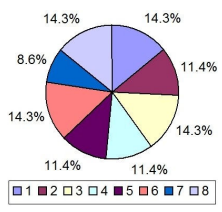

</div>


In [9]:
# Selección de padres
def seleccion_ruleta(poblacion, aptitudes):
    total_aptitud = np.sum(aptitudes)

    # Evitar división por cero si todas las aptitudes son cero
    if total_aptitud == 0:
        probabilidades = np.ones(len(poblacion)) / len(poblacion)
    else:
        probabilidades = aptitudes / total_aptitud

    # Selecciona dos individuos con probabilidad proporcional a su aptitud
    indices = np.random.choice(len(poblacion), size=2, p=probabilidades)

    return [poblacion[i] for i in indices] # Return a list of selected individuals

### Cruce y Mutación.

In [10]:
def cruce(padre1, padre2):
    """Fusiona información de dos genotipos parentales en uno o dos genotipos descendientes.

    Args:
        padre1 (float): Genotipo del padre 1.
        padre2 (float): Genotipo del padre 2.

    Returns:
        tuple: (hijo1, hijo2)
    """
    punto_cruce = np.random.randint(1, len(padre1) - 1)
    hijo1 = np.concatenate((padre1[:punto_cruce], padre2[punto_cruce:]))
    hijo2 = np.concatenate((padre2[:punto_cruce], padre1[punto_cruce:]))
    
    return hijo1, hijo2

def mutacion_un_bit(individuo):
    """Se aplica a un genotipo y entraga un mutante.

    Args:
        individuo (numpy): Cromosoma del individuo a cambiar,

    Returns:
        numpy.array: numpy.array(mutacion_individuo)
    """
    bit_a_mutar = np.random.randint(len(individuo))
    individuo[bit_a_mutar] = 1 - individuo[bit_a_mutar]
    
    return individuo

### Reemplazo Elitista

In [11]:
def reemplazo_elitista(poblacion, nueva_poblacion, num_elites):
    """El reemplazo elitista asegura que los 
       mejores individuos de la población actual se preserven para la siguiente generación.

    Args:
        poblacion (np.array(n*m)): Población
        poblacion (np.array(n*m)): Nueva población
        num_elites (int): tamaño del grupo élite.

    Returns:
        _type_: _description_
    """
    poblacion_ordenada = sorted(poblacion, key=lambda ind: funcion_aptitud(ind, 0, 31), reverse=True)
    nueva_poblacion_ordenada = sorted(nueva_poblacion, key=lambda ind: funcion_aptitud(ind, 0, 31), reverse=True)
    elitistas = poblacion_ordenada[:num_elites]
    nueva_poblacion_reemplazada = elitistas + nueva_poblacion_ordenada[:len(poblacion) - num_elites]
    return np.array(nueva_poblacion_reemplazada)

### Algoritmo Genético

In [12]:
def algoritmo_genetico(poblacion_size, longitud_cromosomas, generaciones,_min,_max,num_elites):
    
    poblacion = generar_poblacion(poblacion_size,l=longitud_cromosomas) # TODO Crear una población.
    
    mejores_aptitudes = []
    mejores_individuos = []

    for generacion in range(generaciones): # TODO Iteración de n generaciones
        
        nueva_poblacion = []
        
        #aptitudes = [np.array(funcion_aptitud(*decodificar_cromosoma(cromosoma,0,5))) for cromosoma in poblacion]
        aptitudes = [funcion_aptitud(cromosoma,_min,_max) for cromosoma in poblacion]
        
        for _ in range(poblacion_size // 2):
            padre1, padre2 = seleccion_ruleta(poblacion,aptitudes)
            hijo1, hijo2 = cruce(padre1,padre2)
            nueva_poblacion.append(mutacion_un_bit(hijo1))
            nueva_poblacion.append(mutacion_un_bit(hijo2))
    
        mejor_aptitud = np.max([funcion_aptitud(cromosoma,_min,_max) for cromosoma in nueva_poblacion])
        mejor_individuo = nueva_poblacion[np.argmax([funcion_aptitud(cromosoma,_min,_max) for cromosoma in nueva_poblacion])]
        mejores_aptitudes.append(mejor_aptitud)
        mejores_individuos.append(mejor_individuo)
        
        # print(mejores_individuos)
        
        print(f'Generación {generacion + 1}: Mejor aptitud = {mejor_aptitud} Mejor individuo = {mejor_individuo}\n')
        
    return mejores_individuos[np.argmax(mejores_aptitudes)]
    

###  Ejercicio.

In [13]:
poblacion_size = 15
longitud_cromosomas = 5
generaciones = 8
num_elites = 2
_min = 29
_max = 80

mejores_aptitudes = algoritmo_genetico(poblacion_size=poblacion_size,
                                     longitud_cromosomas=longitud_cromosomas,
                                     generaciones=generaciones,_min=_min,_max=_max,num_elites=num_elites)
print(f"Mejor individuo para este caso de estudio: {mejores_aptitudes}")

Generación 1: Mejor aptitud = 0 Mejor individuo = [1 1 0 0 1]

Generación 2: Mejor aptitud = 0 Mejor individuo = [1 1 0 1 0]

Generación 3: Mejor aptitud = 0.9999999999999509 Mejor individuo = [0 0 0 0 1]

Generación 4: Mejor aptitud = 0.9999999999999509 Mejor individuo = [0 0 0 0 1]

Generación 5: Mejor aptitud = 0.9999999999999509 Mejor individuo = [0 0 0 0 1]

Generación 6: Mejor aptitud = 0.9999999999999509 Mejor individuo = [0 0 0 0 1]

Generación 7: Mejor aptitud = 0.9999999999999509 Mejor individuo = [0 0 0 0 1]

Generación 8: Mejor aptitud = 0 Mejor individuo = [0 1 0 1 1]

Mejor individuo para este caso de estudio: [0 0 0 0 1]


La función propuesta, la mayoría de la veces, generará aptitudes arriba de 0.9999 por lo que las mejores aptitudes serán la que se encuentren casi llegando a 1 y tendremos presente el mismo individuo más de una generación aplicando las técnicas mencionadas previamente.

Podemos concluir que nuestro algoritmo genético  llega a la mejor optimización.